In [1]:
import twittertennis.handler as tt

In [2]:
%matplotlib inline
import seaborn as sns
sns.set(font="DejaVu Sans",font_scale = 2.2)
sns.set_style("whitegrid")

# 1. Parameters

#### The directory your data will be downloaded to:
- TennisDataHandler automatically downloads the data if you haven't done it in advance)

In [3]:
data_dir = "../data/"

#### Choose a tennis data set:
- **rg17**: Roland-Garros 2017, French Open
- **uo17**: USOpen 2017, USA Open

In [4]:
data_id = "rg17"

#### Choose whether to include data from the qualifiers in your experiments:

In [5]:
with_q = True

# 2. Load and process tennis tournament files

Initialize **TennisDataHandler** with the previously describe parameters. This objects helps you to handle and analyze our tennis tournament data sets.

In [6]:
handler = tt.TennisDataHandler(data_dir, data_id, include_qualifiers=with_q)

Done


# 3. First look

#### After processing input files you can get a summary about the selected data:

In [7]:
handler.summary()

{'data_id': 'rg17',
 'dates': ['2017-05-24',
  '2017-05-25',
  '2017-05-26',
  '2017-05-27',
  '2017-05-28',
  '2017-05-29',
  '2017-05-30',
  '2017-05-31',
  '2017-06-01',
  '2017-06-02',
  '2017-06-03',
  '2017-06-04',
  '2017-06-05',
  '2017-06-06',
  '2017-06-07',
  '2017-06-08',
  '2017-06-09',
  '2017-06-10',
  '2017-06-11'],
 'dates with no game': ['2017-05-27'],
 'end_time': 1497218400,
 'include_qualifiers': True,
 'number_of_edges': 336234,
 'number_of_nodes': 78095,
 'start_time': 1495576800}

## a.) Mentions

#### We extracted the mention network from our data sets. Where each edge (mention) has the following attributes:
- **epoch:** timestamp of the mention
- **src:** source node identifier
- **trg:** target node identifier
- **src_screen_str:** account that made the tweet (~source node)
- **trg_screen_str:** mentioned account (~target node)
- **date:** day of the mention

In [8]:
handler.mentions.head()

,epoch,src,trg,src_screen_str,trg_screen_str,date
544,1495576813,3421383863,3421383863,W3LiveNews,W3LiveNews,2017-05-24
545,1495576832,109918332,34992644,RF_Supporters,cnnsport,2017-05-24
546,1495576832,109918332,50335591,RF_Supporters,Ubitennis,2017-05-24
547,1495576840,413885197,42220353,EiadAkk,rolandgarros,2017-05-24
548,1495576840,413885197,71975446,EiadAkk,Gael_Monfils,2017-05-24


#### Number of edges and nodes in the **Twitter mention network** for each day:

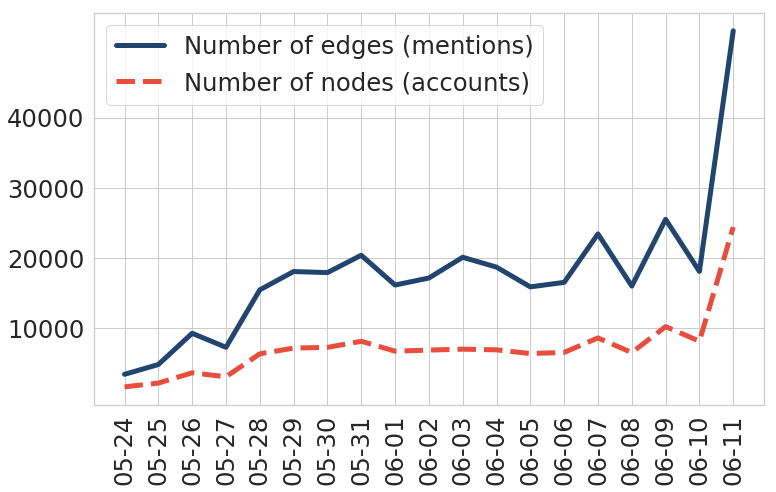

In [9]:
handler.visualize(kind="graph")

## b.) Schedule information

#### You can query the list of tennis games (with several meta data):

In [10]:
handler.schedule.tail()

,day,date,courtName,orderNumber,matchHeader,startDate,playerName active,playerName opponent,matchScore
1128,Day 15,2017-06-11,Philippe-Chatrier Court,2,Men's Singles - Final,11:30 AM,Rafael Nadal,Stan Wawrinka,6-2 6-3 6-1
1129,Day 15,2017-06-11,Suzanne-Lenglen Court,1,Men's Legends Under 45,11:00 AM,Sebastien Grosjean,Paul Haarhuis,6-4 3-6 [10-8]
1130,Day 15,2017-06-11,Suzanne-Lenglen Court,1,Men's Legends Under 45,11:00 AM,Michael Llodra,Andrei Medvedev,6-4 3-6 [10-8]
1131,Day 15,2017-06-11,Suzanne-Lenglen Court,2,Men's Legends Over 45,11:00 AM,Mansour Bahrami,Pat Cash,7-6(3) 6-3
1132,Day 15,2017-06-11,Suzanne-Lenglen Court,2,Men's Legends Over 45,11:00 AM,Fabrice Santoro,Michael Chang,7-6(3) 6-3


#### You can also query the list of tennis players (with meta data) for a given day:

In [11]:
handler.get_daily_players("2017-06-11")

{'Andrei Medvedev': "Men's Legends Under 45_Suzanne-Lenglen Court_1",
 'Ashleigh Barty': "Women's Doubles - Final_Philippe-Chatrier Court_1",
 'Bethanie Mattek-Sands': "Women's Doubles - Final_Philippe-Chatrier Court_1",
 'Casey Dellacqua': "Women's Doubles - Final_Philippe-Chatrier Court_1",
 'Fabrice Santoro': "Men's Legends Over 45_Suzanne-Lenglen Court_2",
 'Lucie Safarova': "Women's Doubles - Final_Philippe-Chatrier Court_1",
 'Mansour Bahrami': "Men's Legends Over 45_Suzanne-Lenglen Court_2",
 'Michael Chang': "Men's Legends Over 45_Suzanne-Lenglen Court_2",
 'Michael Llodra': "Men's Legends Under 45_Suzanne-Lenglen Court_1",
 'Pat Cash': "Men's Legends Over 45_Suzanne-Lenglen Court_2",
 'Paul Haarhuis': "Men's Legends Under 45_Suzanne-Lenglen Court_1",
 'Rafael Nadal': "Men's Singles - Final_Philippe-Chatrier Court_2",
 'Sebastien Grosjean': "Men's Legends Under 45_Suzanne-Lenglen Court_1",
 'Stan Wawrinka': "Men's Singles - Final_Philippe-Chatrier Court_2"}

## c.) Daily tennis player information

Based on events schedules we know the set of players who participated in tennis games for each day:
- **players:** the set of players who participated in tennis games for each day
- **found\_players:** the subset of 'players' who we could assign a Twitter account (in 2017) 
- **missing\_players:** the subset of 'players' who we couldn't find on Twitter (in 2017) 

In [12]:
handler.show_daily_players().tail(3)

,date,players,found_players,missing_players,num_players,num_found_players,num_missing_players,frac_missing_players
17,2017-06-09,"{Yui Kamiji, Nicola Kuhn, Martina Navratilova,...","[Nicola Kuhn, Martina Navratilova, Alexei Popy...","[Elena Rybakina, Yui Kamiji, Jordanne Whiley, ...",71,52,19,0.267606
18,2017-06-10,"{Yui Kamiji, Martina Navratilova, Nicola Kuhn,...","[Martina Navratilova, Nicola Kuhn, Alexei Popy...","[Zsombor Piros, Yui Kamiji, Danny Thomas, Oles...",37,32,5,0.135135
19,2017-06-11,"{Michael Llodra, Bethanie Mattek-Sands, Ashlei...","[Michael Llodra, Bethanie Mattek-Sands, Ashlei...",[Mansour Bahrami],14,13,1,0.071429


#### Daily total number of tennis players (light blue) with the subset of players (dark blue) that we could assign a Twitter account:

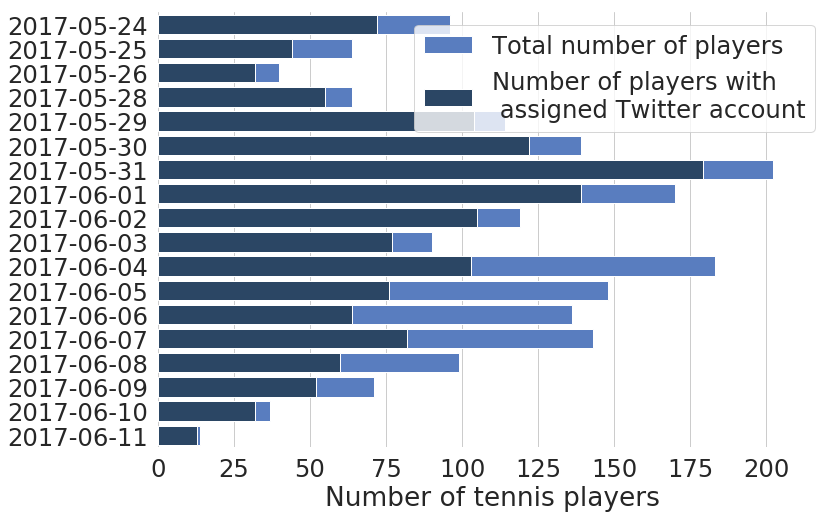

In [13]:
handler.visualize(kind="players")

# 4.) Generate node relevance labels

In [14]:
output_dir = "../%s_with_q%s" % (data_id, with_q)

#### In order to use our data sets for supervised experiments you have to generate node relevance labels for each day:

In [15]:
handler.export_relevance_labels(output_dir, binary=True)

545 81469 21 336234
Labeling users STARTED
Labeling users FINISHED
../rg17_with_qTrue folder was created.
Exporting files STARTED
2017-05-24 81469
2017-05-25 81469
2017-05-26 81469
2017-05-27 81469
2017-05-28 81469
2017-05-29 81469
2017-05-30 81469
2017-05-31 81469
2017-06-01 81469
2017-06-02 81469
2017-06-03 81469
2017-06-04 81469
2017-06-05 81469
2017-06-06 81469
2017-06-07 81469
2017-06-08 81469
2017-06-09 81469
2017-06-10 81469
2017-06-11 81469
Exporting files DONE


#### You can also choose to export only the relevant nodes for each day:

**Evaluation will be much faster this way!**

In [16]:
handler.export_relevance_labels(output_dir+"_relevant", binary=True, only_pos_label=True)

545 81469 21 336234
Labeling users STARTED
Labeling users FINISHED
../rg17_with_qTrue_relevant folder was created.
Exporting files STARTED
2017-05-24 66
2017-05-25 44
2017-05-26 34
2017-05-27 0
2017-05-28 60
2017-05-29 118
2017-05-30 138
2017-05-31 194
2017-06-01 148
2017-06-02 120
2017-06-03 83
2017-06-04 116
2017-06-05 81
2017-06-06 71
2017-06-07 96
2017-06-08 64
2017-06-09 57
2017-06-10 33
2017-06-11 18
Exporting files DONE
